# Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [2]:
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))
allSubjDirs = glob.glob(dataDir + os.sep + 'mcvct*')
print allSubjDirs
subjDir = allSubjDirs[0] # this will eventually go through a loop
print subjDir
subjFilePath = glob.glob(subjDir + os.sep + 'mcvct*.csv')[0]
print subjFilePath
ds = pd.read_csv(subjFilePath)
print ds.head(5)
print ds.columns

['/Users/egor/Dropbox/Projects/mc/data/mcvct_p0_s1_2016-10-17_1658']
/Users/egor/Dropbox/Projects/mc/data/mcvct_p0_s1_2016-10-17_1658
/Users/egor/Dropbox/Projects/mc/data/mcvct_p0_s1_2016-10-17_1658/mcvct_p0_s1_2016-10-17_1658.csv
  expName             time  participant  session  trialN  dirL  dirR   vL  \
0   mcvct  2016-10-17_1658            0        1       1   180     0  0.6   
1   mcvct  2016-10-17_1658            0        1       2     0   180  1.2   
2   mcvct  2016-10-17_1658            0        1       3     0   180  4.8   
3   mcvct  2016-10-17_1658            0        1       4   180     0  1.2   
4   mcvct  2016-10-17_1658            0        1       5     0   180  4.8   

    vR  szL   ...    nNa  nf000  nf090  nf180  nf270     pd000  pd090 pd180  \
0  0.3  256   ...      0      0      0      0      1  0.000000      0     0   
1  2.4  256   ...      0      1      0      0      0  0.016667      0     0   
2  0.6  256   ...      0      0      0      0      1  0.000000      0

For each participant, plotting the number of left/right/up/down responses throughout the trial. Transforming the data set first.

In [4]:
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

  expName             time  participant  session  trialN  dirL  dirR   vL  \
0   mcvct  2016-10-17_1658            0        1       1   180     0  0.6   
1   mcvct  2016-10-17_1658            0        1       2     0   180  1.2   
2   mcvct  2016-10-17_1658            0        1       3     0   180  4.8   
3   mcvct  2016-10-17_1658            0        1       4   180     0  1.2   
4   mcvct  2016-10-17_1658            0        1       5     0   180  4.8   

    vR  szL ...   nf270     pd000  pd090  pd180     pd270  qnResp  vDiffR  \
0  0.3  256 ...       1  0.000000      0      0  0.016667       0    -0.3   
1  2.4  256 ...       0  0.016667      0      0  0.000000       0     1.2   
2  0.6  256 ...       1  0.000000      0      0  0.016667       0    -4.2   
3  0.3  256 ...       1  0.000000      0      0  0.016667       0    -0.9   
4  9.6  256 ...       0  0.016667      0      0  0.000000       0     4.8   

  v000 v180  nfR  
0  0.3  0.6    0  
1  1.2  2.4    1  
2  4.8  0.6    0 

# Summary data

Some summary statistics. What kinds of trials lead to 'down' response (i.e., stationary or meaningless patchiness), 'up' response (transparency), and directional responses?

In [36]:
#ds['n'] = ds.groupby(['v000'])['nf000'].transform('sum')
#print grp.head()
ds.groupby('v000')['nf000'].agg([np.sum, np.mean, np.std])

,sum,mean,std
v000,,,
0.0,1,0.083333,0.288675
0.3,1,0.071429,0.267261
0.6,1,0.071429,0.267261
1.2,5,0.357143,0.497245
2.4,3,0.214286,0.425815
4.8,1,0.071429,0.267261
9.6,0,0.000000,0.000000


In [35]:
ds.groupby('v180')['nf180'].agg([np.sum, np.mean, np.std])

,sum,mean,std
v180,,,
0.0,0,0.000000,0.000000
0.3,1,0.071429,0.267261
0.6,1,0.071429,0.267261
1.2,2,0.142857,0.363137
2.4,4,0.285714,0.468807
4.8,2,0.142857,0.363137
9.6,2,0.142857,0.363137


# Central predominance

The first plot shows simply the trend overall: as the speed keeps increasing toward the right, what happens to the predominance of the right stimulus? The predominance is quantified simply as the number of frames marked as Right-dominant minus Left-dominant.

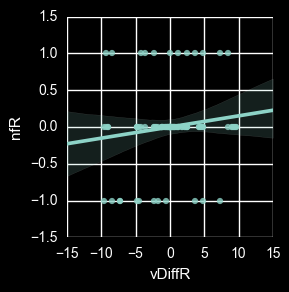

In [5]:
%matplotlib inline
plt.style.use('dark_background')
ax = sns.lmplot(x='vDiffR', y='nfR', data=ds, size=3)
plt.show()

The next plots show the two directions separately. The question is, what is the predominance given the increase of the velocity to the right? And to the left? Left column is for central presentation, the right is peripheral.

(-0.1, 1.1)

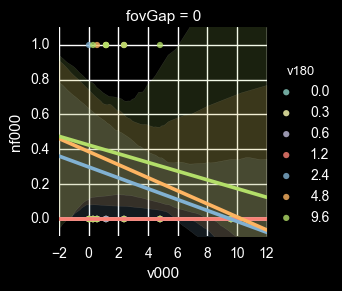

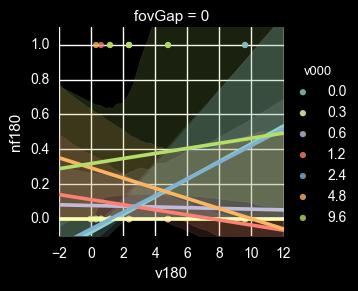

In [13]:
lm = sns.lmplot(x='v000', y='nf000', hue='v180', col='fovGap', data=ds, size=3)
lm.axes[0,0].set_ylim(-0.1,1.1)
lm = sns.lmplot(x='v180', y='nf180', hue='v000', col='fovGap', data=ds, size=3)
lm.axes[0,0].set_ylim(-0.1,1.1)

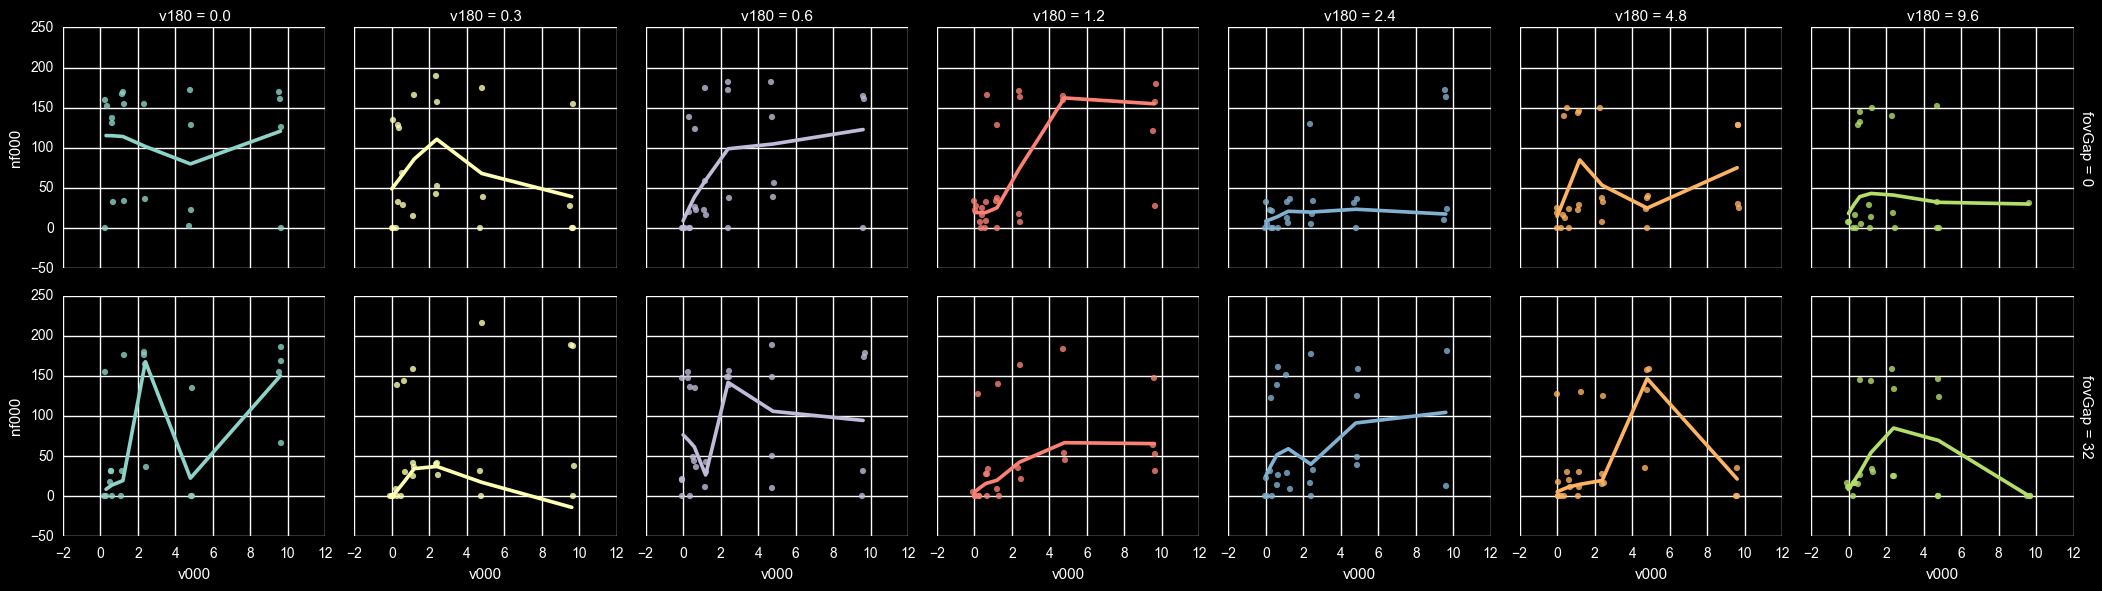

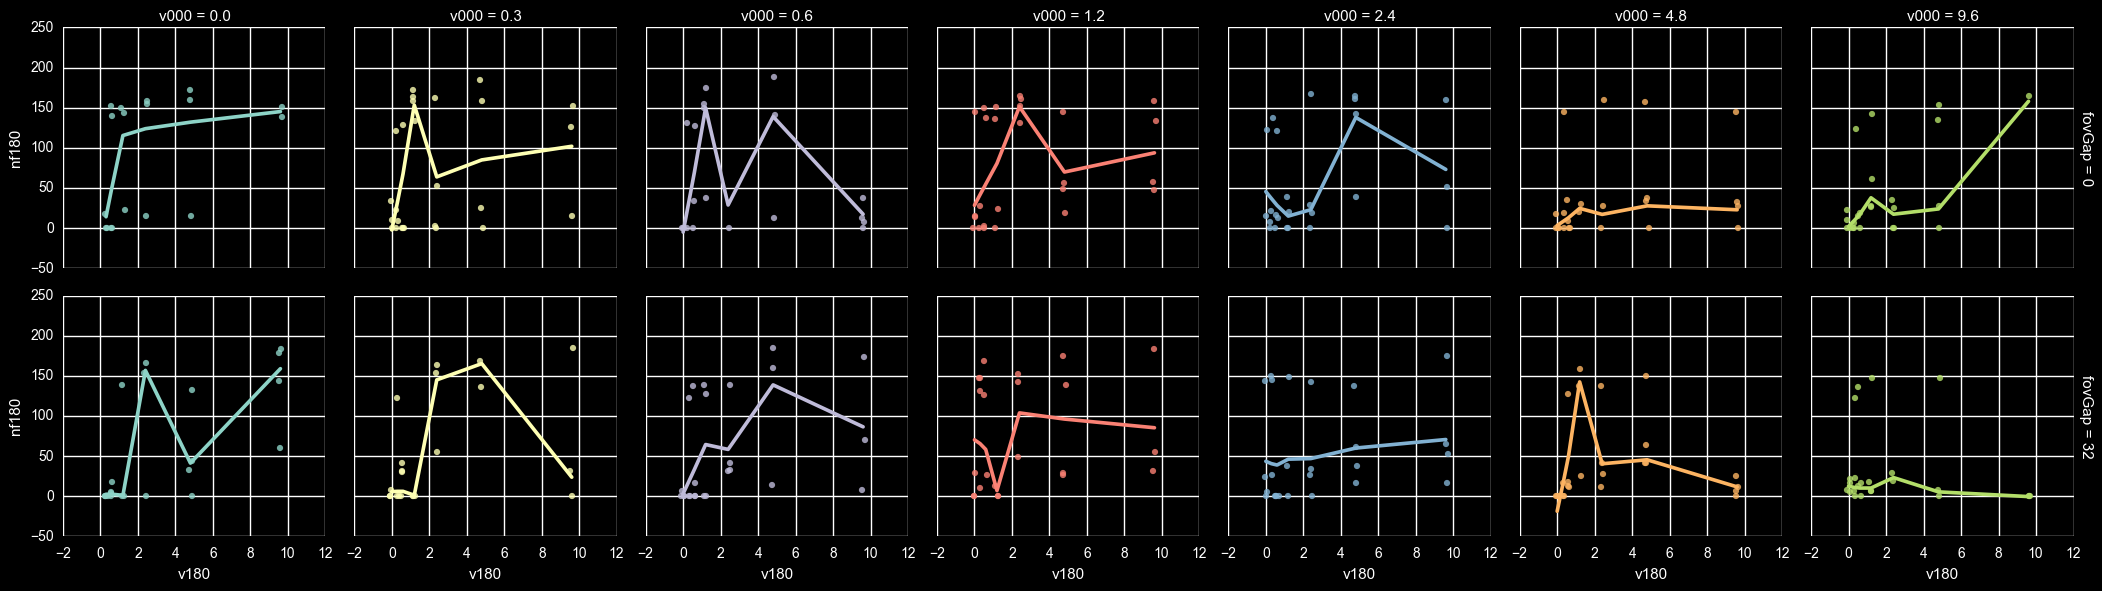

In [65]:
g = sns.FacetGrid(ds, row='fovGap', col='v180', hue='v180', margin_titles=True)
g.map(sns.regplot, "v000", "nf000", lowess=True, x_jitter=.1);
g = sns.FacetGrid(ds, row='fovGap', col='v000', hue='v000', margin_titles=True)
g.map(sns.regplot, "v180", "nf180", lowess=True, x_jitter=.1);

## Short and long predominance duration trials separately

Given that there seem to be differences between the trials with dominance greater than ~100 frames, rendering the two separately:

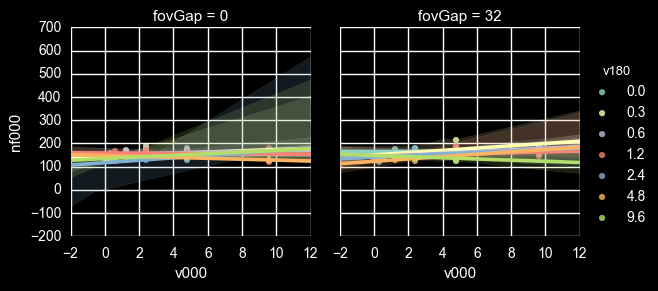

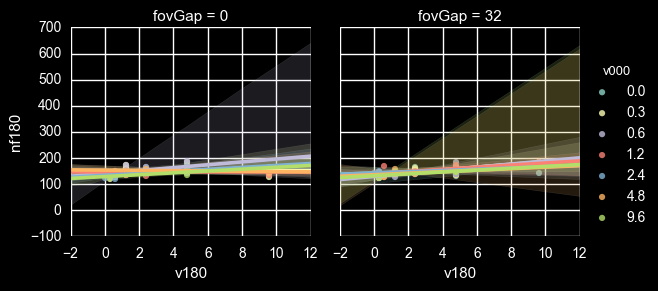

In [60]:
ss = ds.ix[ds['nf000']>100,:]
sns.lmplot(x='v000', y='nf000', hue='v180', col='fovGap', data=ss, size=3)
ss = ds.ix[ds['nf180']>100,:]
sns.lmplot(x='v180', y='nf180', hue='v000', col='fovGap', data=ss, size=3)

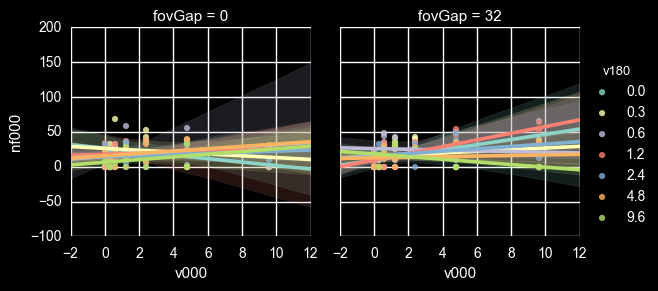

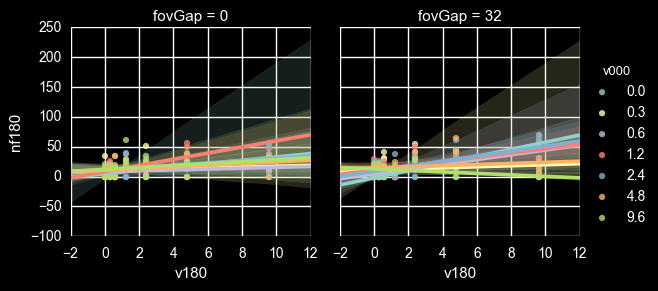

In [61]:
ss = ds.ix[ds['nf000']<100,:]
sns.lmplot(x='v000', y='nf000', hue='v180', col='fovGap', data=ss, size=3)
ss = ds.ix[ds['nf180']<100,:]
sns.lmplot(x='v180', y='nf180', hue='v000', col='fovGap', data=ss, size=3)

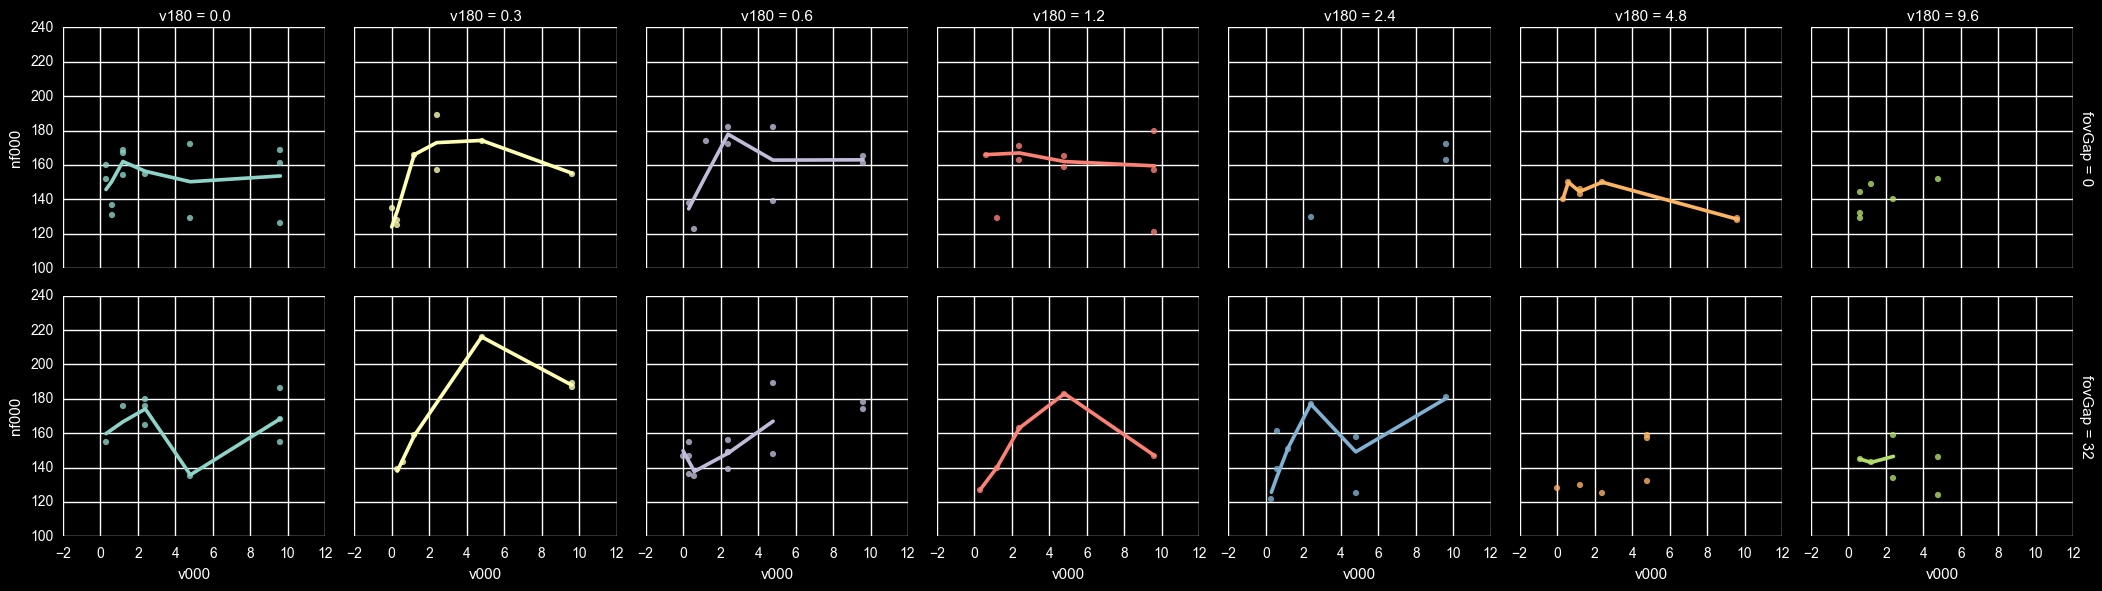

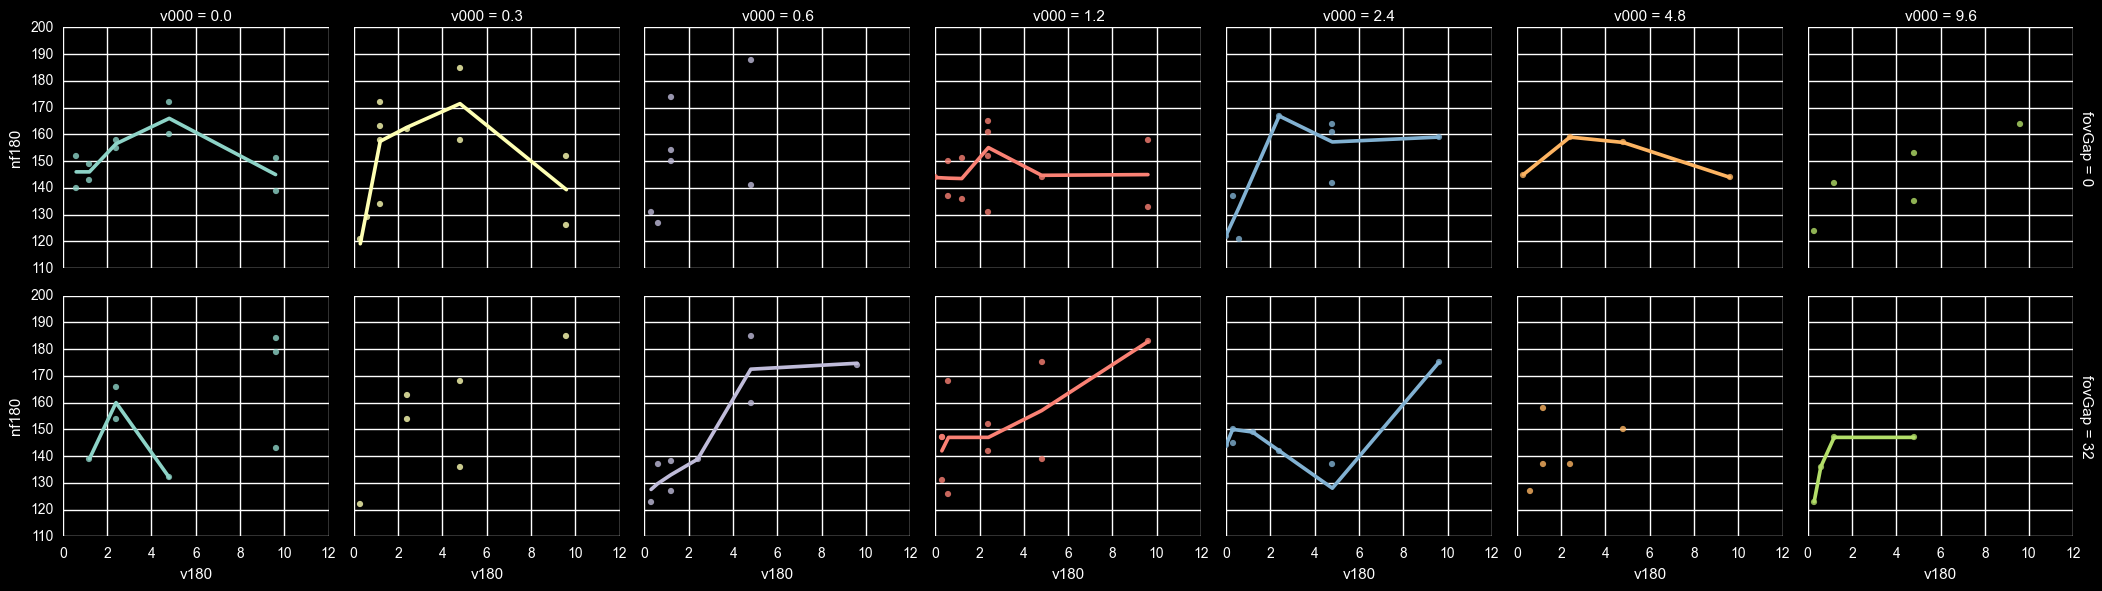

In [68]:
ss = ds.ix[ds['nf000']>100,:]
g = sns.FacetGrid(ss, row='fovGap', col='v180', hue='v180', margin_titles=True)
g.map(sns.regplot, "v000", "nf000", lowess=True);
ss = ds.ix[ds['nf180']>100,:]
g = sns.FacetGrid(ss, row='fovGap', col='v000', hue='v000', margin_titles=True)
g.map(sns.regplot, "v180", "nf180", lowess=True);

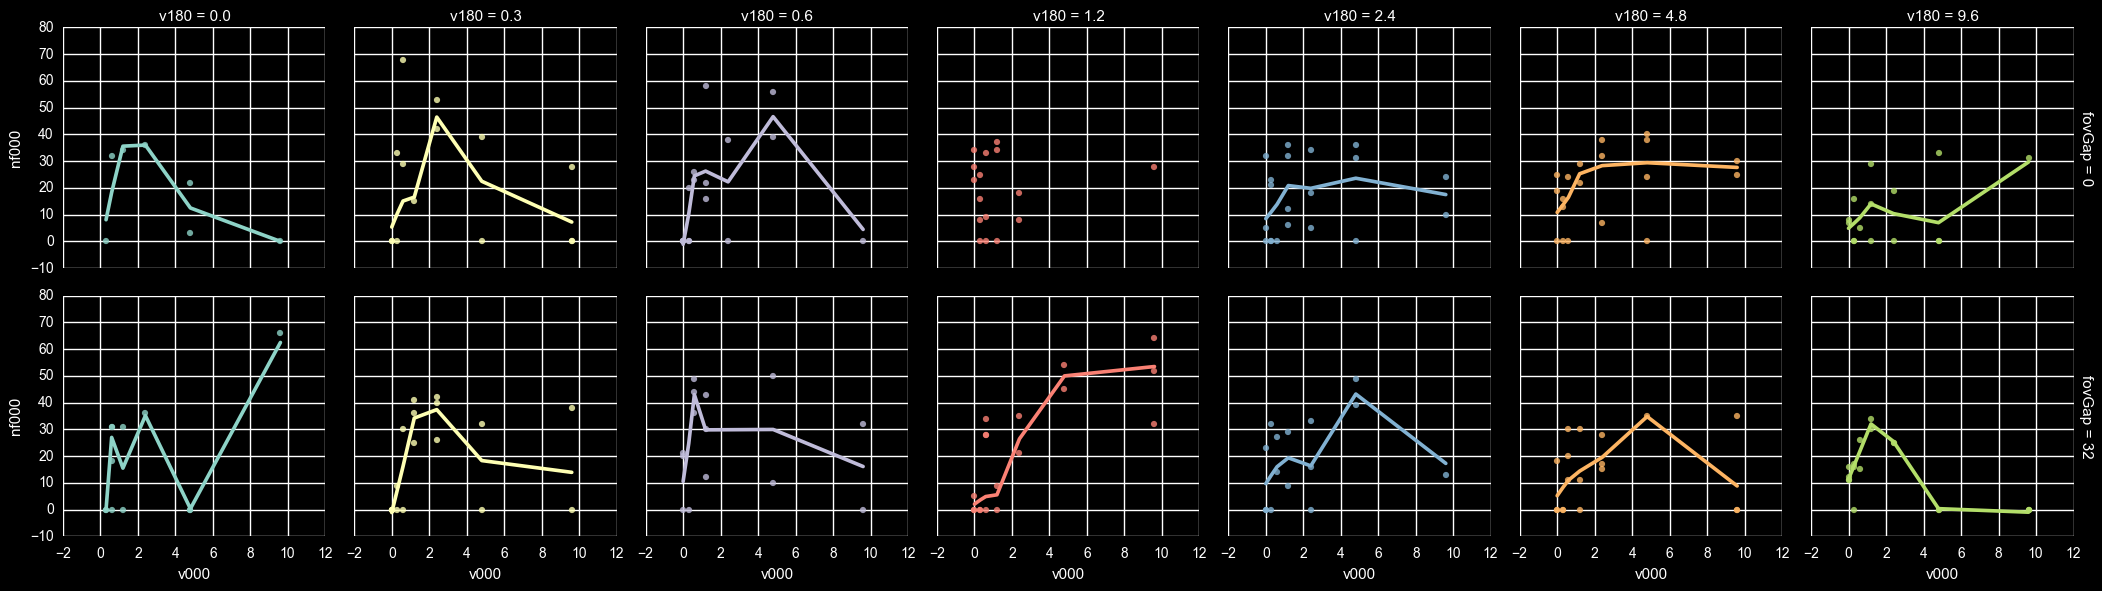

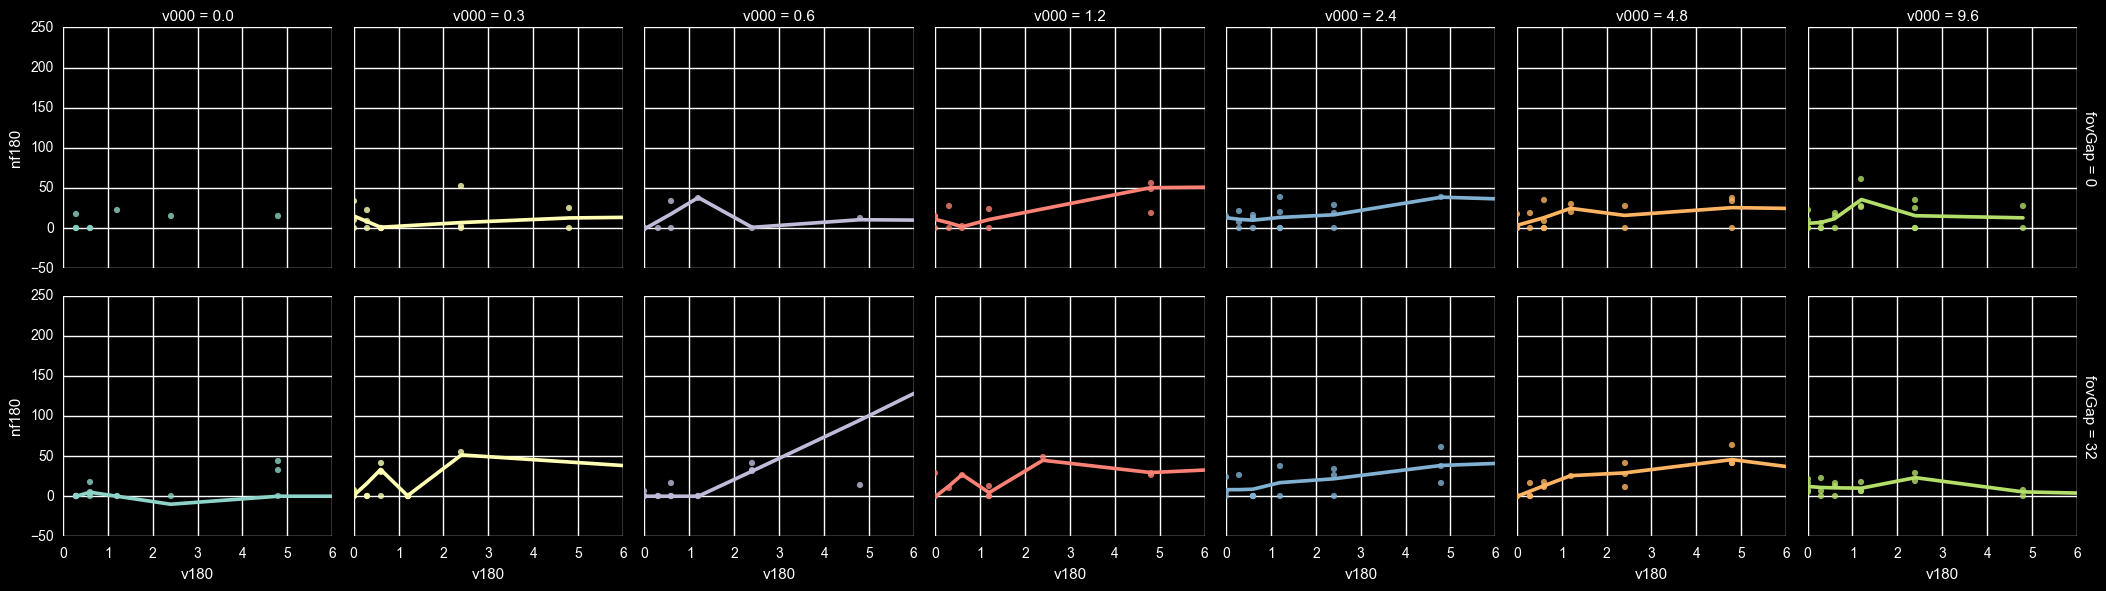

In [69]:
ss = ds.ix[ds['nf000']<100,:]
g = sns.FacetGrid(ss, row='fovGap', col='v180', hue='v180', margin_titles=True)
g.map(sns.regplot, "v000", "nf000", lowess=True);
ss = ds.ix[ds['nf180']<100,:]
g = sns.FacetGrid(ss, row='fovGap', col='v000', hue='v000', margin_titles=True)
g.map(sns.regplot, "v180", "nf180", lowess=True);

# Predominance percentage

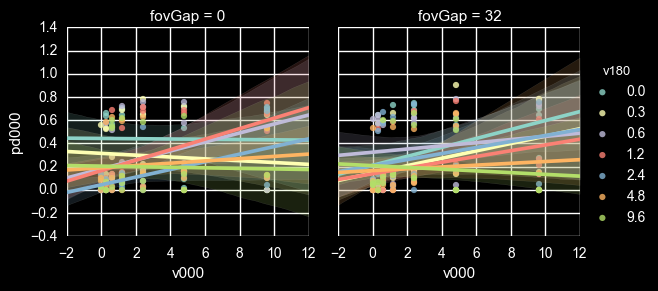

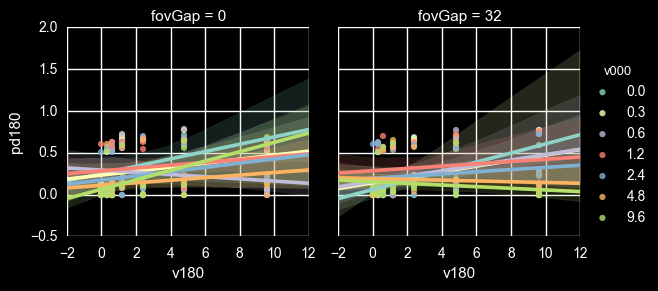

In [72]:
sns.lmplot(x='v000', y='pd000', hue='v180', col='fovGap', data=ds, size=3)
sns.lmplot(x='v180', y='pd180', hue='v000', col='fovGap', data=ds, size=3)

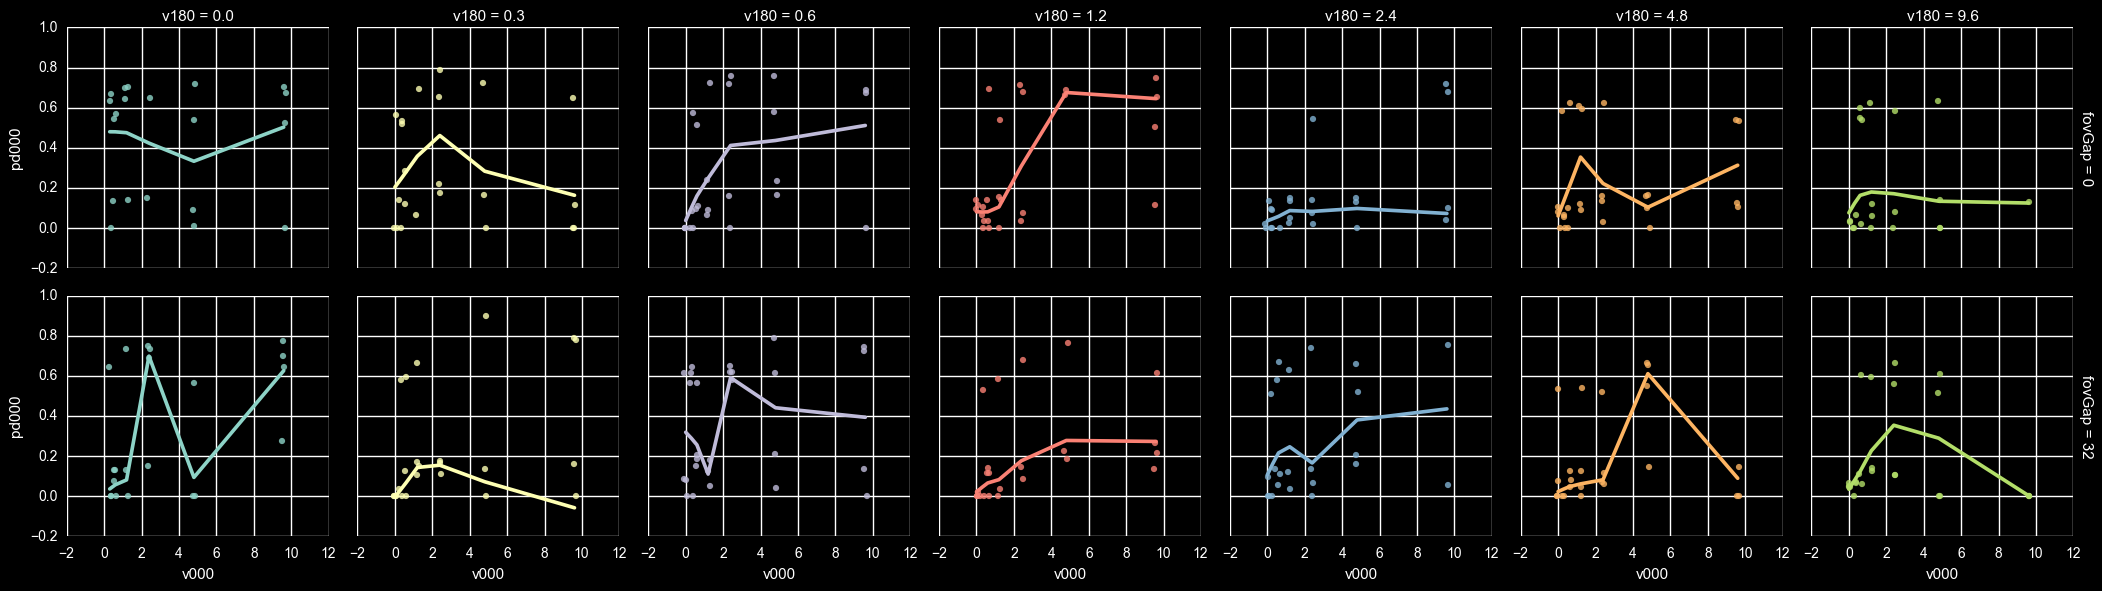

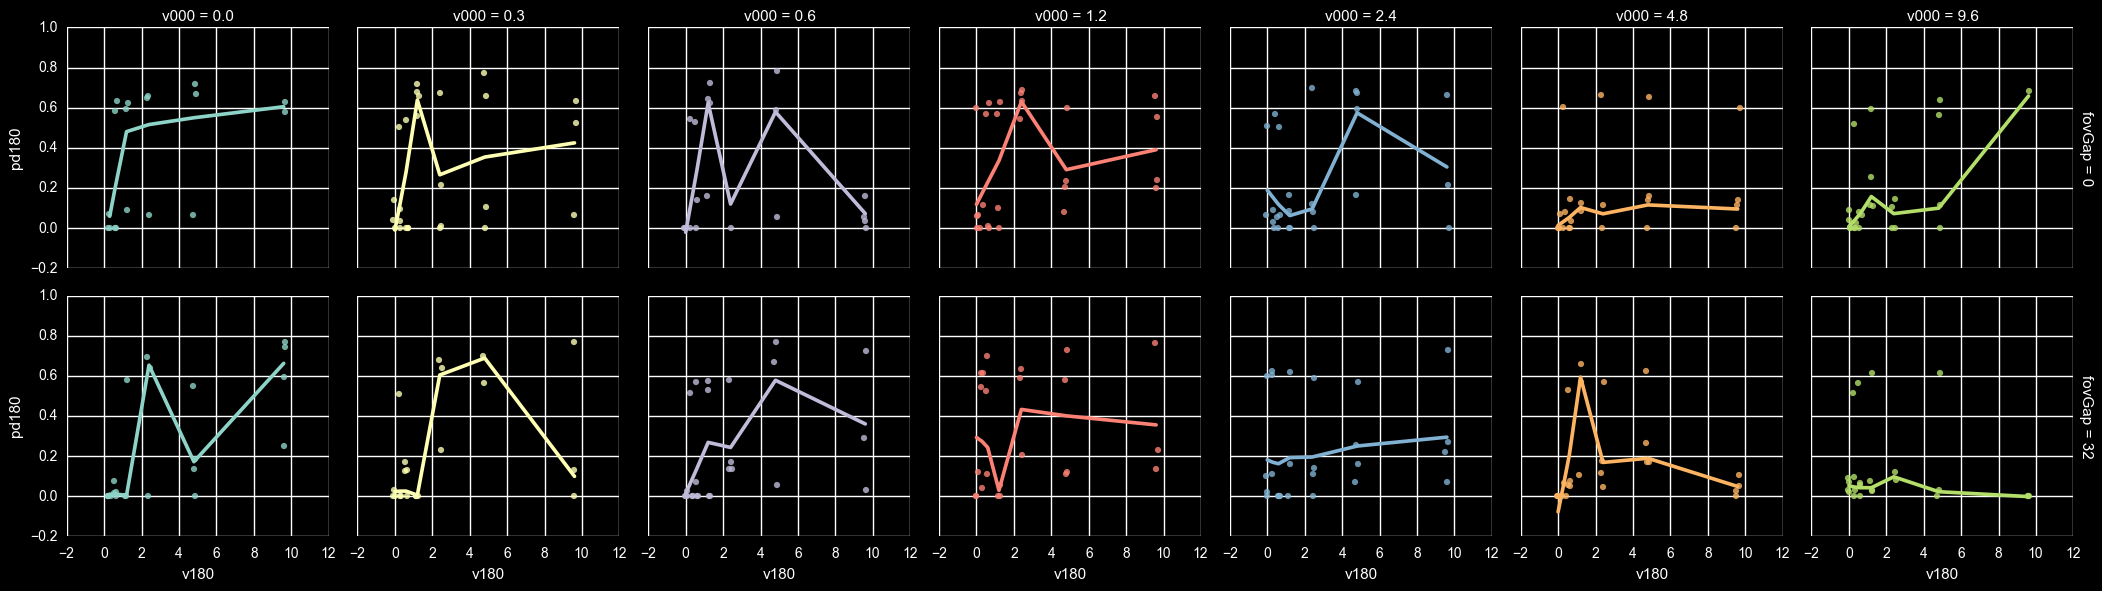

In [70]:
g = sns.FacetGrid(ds, row='fovGap', col='v180', hue='v180', margin_titles=True)
g.map(sns.regplot, "v000", "pd000", lowess=True, x_jitter=.1);
g = sns.FacetGrid(ds, row='fovGap', col='v000', hue='v000', margin_titles=True)
g.map(sns.regplot, "v180", "pd180", lowess=True, x_jitter=.1);